# U.S. Medical Insurance Costs

## Project Purpose
The focus of this project is to examine how six different attributes affect the price of a person's insurance cost. The factors we are examining are
- age<br>
- bmi<br> 
- sex<br>
- number of children<br>
- smoker vs non-smoker<br>
- the region they reside in

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statistics as stat

# read in the file
ins_df = pd.read_csv('insurance.csv')

In [2]:
# save our columns as their own variables
ages = list(ins_df['age'])
sex = list(ins_df['sex'])
bmis = list(ins_df['bmi'])
children = list(ins_df['children'])
smoker = list(ins_df['smoker'])
regions = list(ins_df['region'])
charges = list(ins_df['charges'])

In [16]:
# functions used to find the min and max for each numeric attribute list
def min_item(factor_list):
    # start by having a min_item variable set to something really high
    smallest_item = 150
    for item in factor_list:
        # check each age in the list
        if item <= smallest_item:
            smallest_item = item
    return smallest_item

def max_item(factor_list):
    # start by having a max_item variable set to 0
    largest_item = 0
    for item in factor_list:
        # check each age in the list
        if item >= largest_item:
            largest_item = item
    return largest_item

min_age = min_item(ages) # this value is 18
max_age = max_item(ages) # this value is 64

min_bmi = min_item(bmis) # this value is 15.96
max_bmi = max_item(bmis) # this value is 53.13

min_children = min_item(children) # this value is 0
max_children = max_item(children) # this value is 5

In [4]:
# function to divide our data into our intervals
def interval_data(low, high, factor_list):
    # create intervals to store the charges list, total costs, and number of people in each list
    interval_charges = []
    interval_total_cost = 0
    interval_count = 0

    # add items to the interval_charges list and add to total cost
    for i in range(len(factor_list)):
        item = factor_list[i]
        if item >= low and item < high:
            interval_charges.append(charges[i])
            interval_total_cost += charges[i]
            interval_count += 1
            
    # find average cost rounded for money value
    avg_cost = round(interval_total_cost / interval_count, 2)

    # return our data
    return interval_charges, avg_cost

## Age
We want to look at different age intervals to see how age affects pricing. We broke them into intervals based on being in similar stages of life and having roughly the same amount of data. The intervals are<br>
1. 18 - 23
2. 23 - 30
3. 30 - 40
4. 40 - 50
5. 50 - 57
6. 57 - 65

In [17]:
# create interval label for graphs
age_intervals = ['18 - 23', '23 - 30', '30 - 40', '40 - 50', '50 - 57', '57 - 65']

# obtain interval data
age_interval_1_charges, age_interval_1_avg_cost = interval_data(18, 23, ages)
age_interval_2_charges, age_interval_2_avg_cost = interval_data(23, 30, ages)
age_interval_3_charges, age_interval_3_avg_cost = interval_data(30, 40, ages)
age_interval_4_charges, age_interval_4_avg_cost = interval_data(40, 50, ages)
age_interval_5_charges, age_interval_5_avg_cost = interval_data(50, 57, ages)
age_interval_6_charges, age_interval_6_avg_cost = interval_data(57, 65, ages)

# add these to overall lists
age_intervals_counts = [len(age_interval_1_charges), len(age_interval_2_charges), 
                        len(age_interval_3_charges), len(age_interval_4_charges), 
                        len(age_interval_5_charges), len(age_interval_6_charges)]
print(age_intervals_counts)

[222, 195, 257, 279, 195, 190]


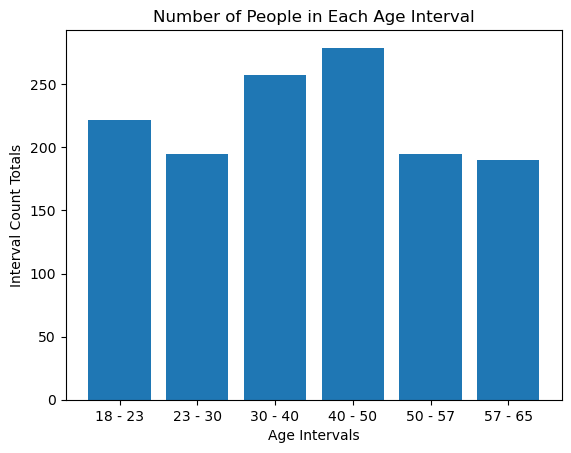

In [19]:
# plot interval counts on a bar chart so we can see how our data is distributed in the intervals
plt.bar(age_intervals, age_intervals_counts)
plt.xlabel('Age Intervals')
plt.ylabel('Interval Count Totals')
plt.title('Number of People in Each Age Interval')
plt.show()

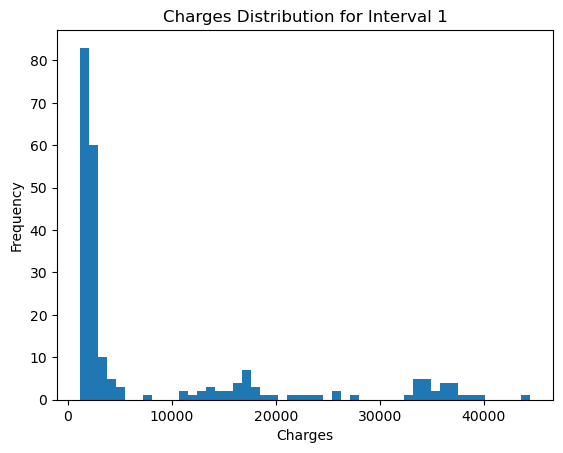

In [18]:
# plot charges for each interval on histograms so we can see the distribution w in the interval
plt.hist(age_interval_1_charges, bins=50)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Interval 1')
plt.show()

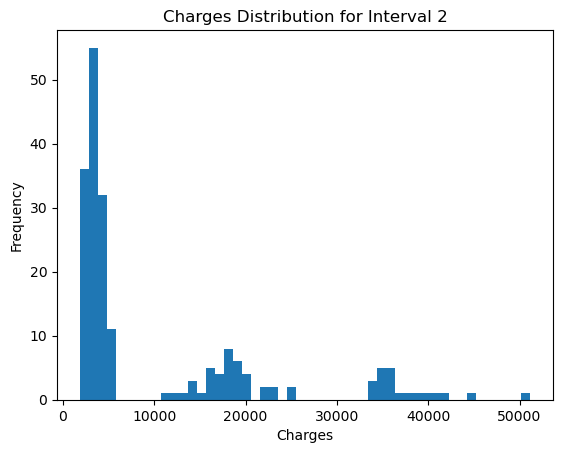

In [20]:
plt.hist(age_interval_2_charges, bins=50)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Interval 2')
plt.show()

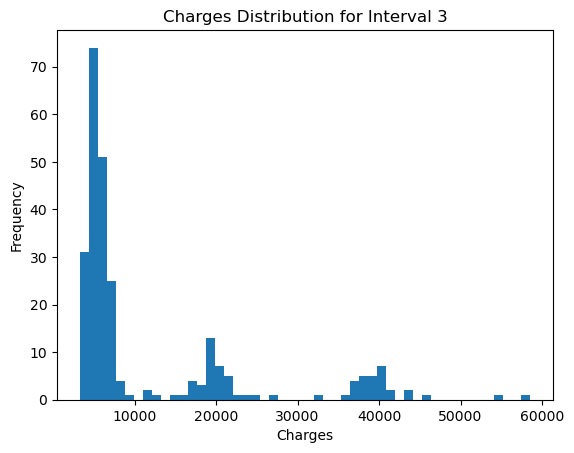

In [21]:
plt.hist(age_interval_3_charges, bins=50)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Interval 3')
plt.show()

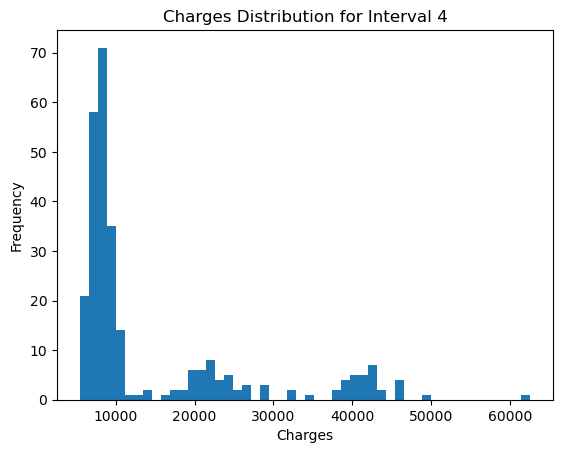

In [22]:
plt.hist(age_interval_4_charges, bins=50)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Interval 4')
plt.show()

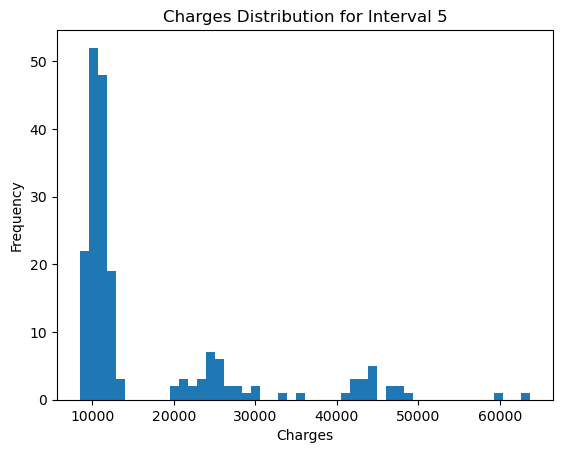

In [23]:
plt.hist(age_interval_5_charges, bins=50)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Interval 5')
plt.show()

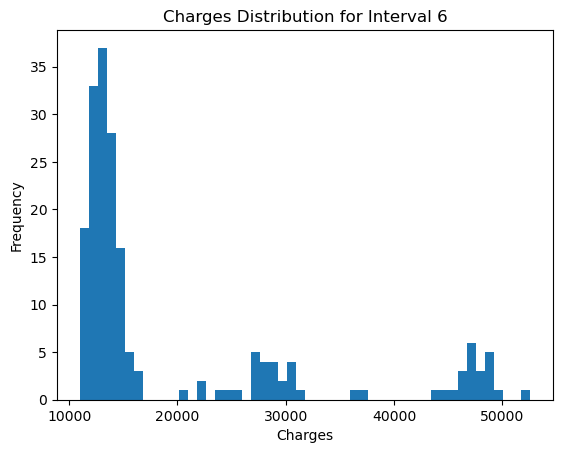

In [24]:
plt.hist(age_interval_6_charges, bins=50)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Interval 6')
plt.show()

All of our intervals are showing right skewed data. Due to this, when comparing our intervals we will look at their medians since the outliers shown will affect the means significantly.

In [25]:
# obtain the median for each interval
age_interval_1_median = stat.median(age_interval_1_charges)
age_interval_2_median = stat.median(age_interval_2_charges)
age_interval_3_median = stat.median(age_interval_3_charges)
age_interval_4_median = stat.median(age_interval_4_charges)
age_interval_5_median = stat.median(age_interval_5_charges)
age_interval_6_median = stat.median(age_interval_6_charges)

# get an overall list
age_interval_medians = [age_interval_1_median, age_interval_2_median,
                        age_interval_3_median, age_interval_4_median,
                        age_interval_5_median, age_interval_6_median]
print(age_interval_medians)

[2209.4141, 3981.9768, 6082.405, 8606.2174, 11163.568, 13625.99825]


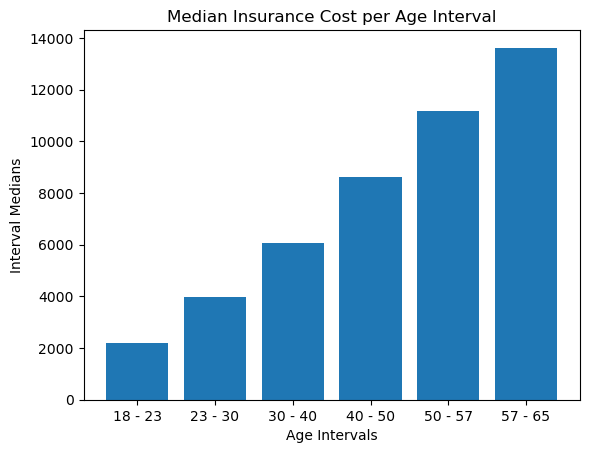

In [26]:
# graph the medians so we can have a visual
plt.bar(age_intervals, age_interval_medians)
plt.xlabel('Age Intervals')
plt.ylabel('Interval Medians')
plt.title('Median Insurance Cost per Age Interval')
plt.show()

### Findings
We chose intervals that would split our data the most evenly while also dividing people based on life stage. The average cost was not a good indicator because each interval was right skewed, so we looked at their median values instead. While we can't say why insurance cost increases with age we can see that our data suggests that it does.

## Body Mass Index (BMI)
We next want to compare the insurance costs for different BMI intervals. We split our intervals in a way where the data would be most evenly spread since it was highly clustered. These intervals are<br>
1. 15 - 23
2. 23 - 27
3. 27 - 30
4. 30 - 33
5. 33 - 37
6. 37 - 54

In [29]:
# create interval label for graphs
bmi_intervals = ['15 - 23', '23 - 27', '27 - 30', '30 - 33', '33 - 37', '37 - 54']

# obtain interval data
bmi_interval_1_charges, bmi_interval_1_avg_cost = interval_data(15, 23, bmis)
bmi_interval_2_charges, bmi_interval_2_avg_cost = interval_data(23, 27, bmis)
bmi_interval_3_charges, bmi_interval_3_avg_cost = interval_data(27, 30, bmis)
bmi_interval_4_charges, bmi_interval_4_avg_cost = interval_data(30, 33, bmis)
bmi_interval_5_charges, bmi_interval_5_avg_cost = interval_data(33, 37, bmis)
bmi_interval_6_charges, bmi_interval_6_avg_cost = interval_data(37, 54, bmis)

# add these to overall lists
bmi_intervals_counts = [len(bmi_interval_1_charges), len(bmi_interval_2_charges), 
                        len(bmi_interval_3_charges), len(bmi_interval_4_charges), 
                        len(bmi_interval_5_charges), len(bmi_interval_6_charges)]
print(bmi_intervals_counts)

[136, 248, 247, 245, 258, 204]


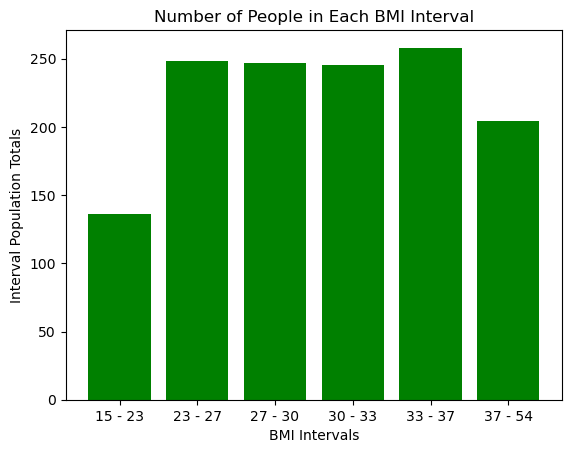

In [30]:
# plot interval counts on a bar chart so we can see how our data is distributed
plt.bar(bmi_intervals, bmi_intervals_counts, color='green')
plt.xlabel('BMI Intervals')
plt.ylabel('Interval Population Totals')
plt.title('Number of People in Each BMI Interval')
plt.show()

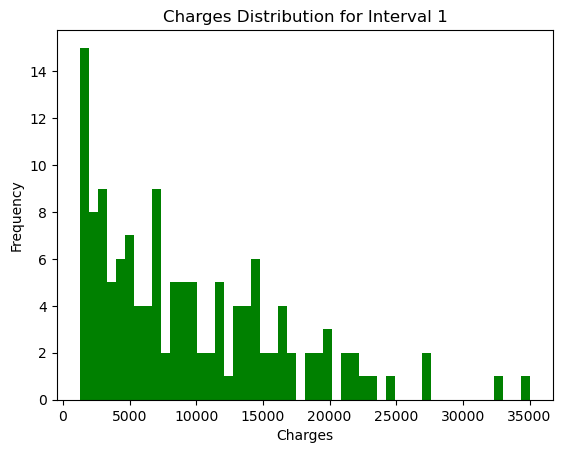

In [37]:
# plot the charges for each interval on a histogram to see the distribution
plt.hist(bmi_interval_1_charges, bins=50, color='green')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Interval 1')
plt.show()

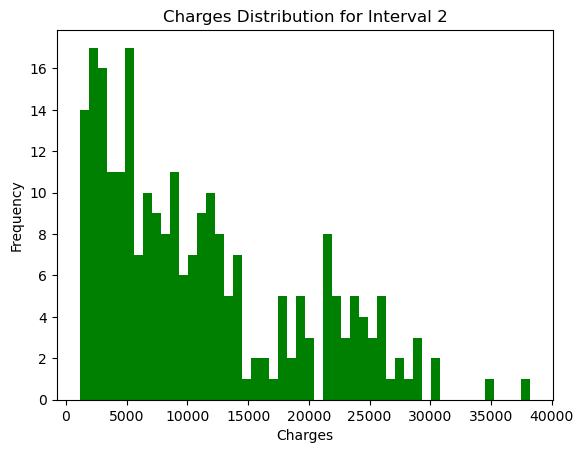

In [38]:
plt.hist(bmi_interval_2_charges, bins=50, color='green')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Interval 2')
plt.show()

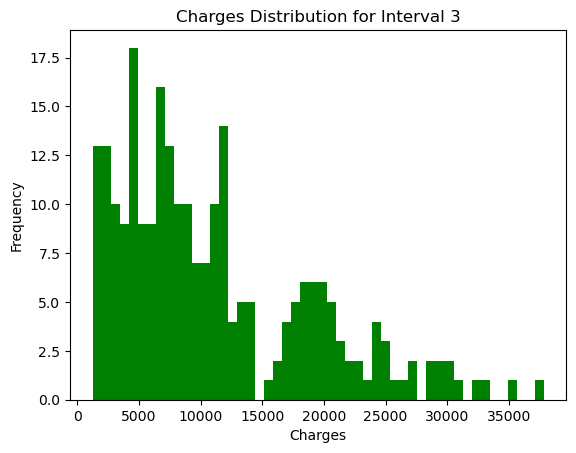

In [39]:
plt.hist(bmi_interval_3_charges, bins=50, color='green')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Interval 3')
plt.show()

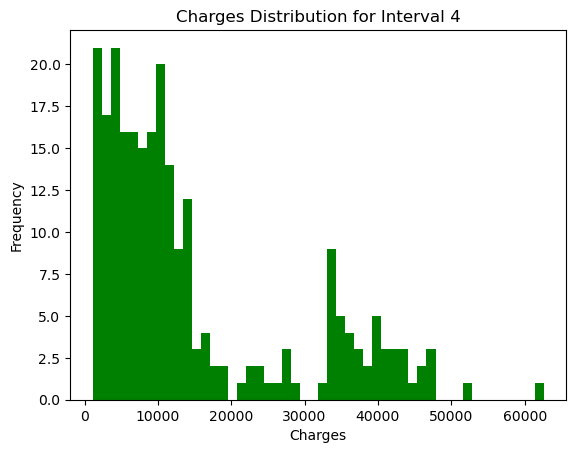

In [40]:
plt.hist(bmi_interval_4_charges, bins=50, color='green')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Interval 4')
plt.show()

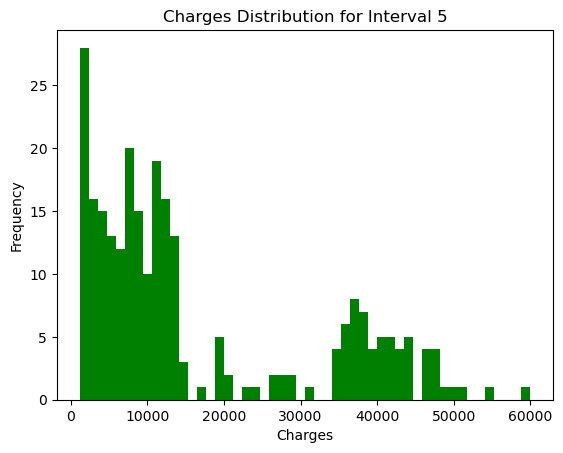

In [41]:
plt.hist(bmi_interval_5_charges, bins=50, color='green')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Interval 5')
plt.show()

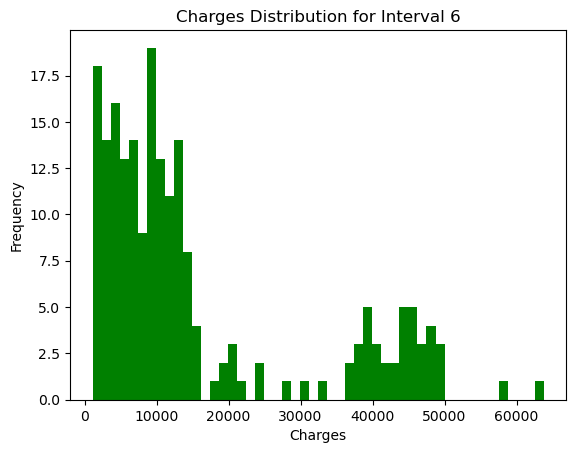

In [42]:
plt.hist(bmi_interval_6_charges, bins=50, color='green')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Interval 6')
plt.show()

Since we are seeing a right skewed distribution for all intervals we will compare their medians.

In [43]:
# obtain the median for each interval
bmi_interval_1_median = stat.median(bmi_interval_1_charges)
bmi_interval_2_median = stat.median(bmi_interval_2_charges)
bmi_interval_3_median = stat.median(bmi_interval_3_charges)
bmi_interval_4_median = stat.median(bmi_interval_4_charges)
bmi_interval_5_median = stat.median(bmi_interval_5_charges)
bmi_interval_6_median = stat.median(bmi_interval_6_charges)

# get an overall list
bmi_interval_medians = [bmi_interval_1_median, bmi_interval_2_median,
                        bmi_interval_3_median, bmi_interval_4_median,
                        bmi_interval_5_median, bmi_interval_6_median]
print(bmi_interval_medians)

[7756.260725, 8804.83945, 8703.456, 9778.3472, 10470.9852, 9878.83785]


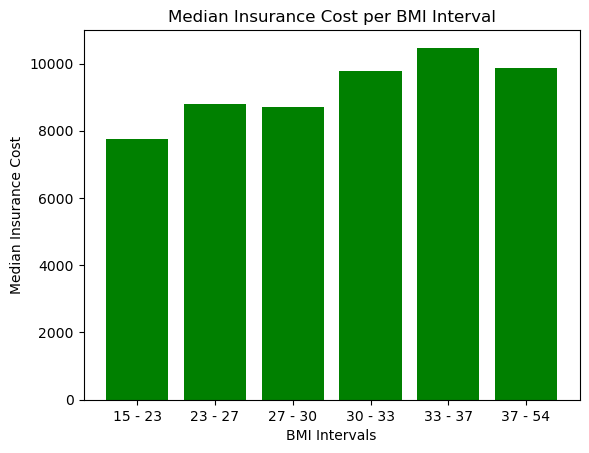

In [44]:
# use a bar chart to see the change in medians with change in bmi
plt.bar(bmi_intervals, bmi_interval_medians, color='green')
plt.xlabel('BMI Intervals')
plt.ylabel('Median Insurance Cost')
plt.title('Median Insurance Cost per BMI Interval')
plt.show()

### Findings
Based on our intervals looking it appears that when BMI increases the insurance costs do as well. This could be due to the fact that people with higher BMI's tend to be in worse health which increases their costs, but the exact reasoning is not something we can determine.

## Sex
We next want to look at how insurance prices differ for men vs women.

In [82]:
# function used to separate our data into male or female
def sex_data():
    male_costs = []
    female_costs = []
    for i in range(len(sex)):
        if sex[i] == 'male':
            male_costs.append(charges[i])
        else:
            female_costs.append(charges[i])
    return male_costs, female_costs

# obtain the length of each list so we can see how many men and women we have
sex_labels = ['Men', 'Women']
male_charges, female_charges = sex_data()
sex_counts = [len(male_charges), len(female_charges)]
print(sex_counts)

[676, 662]


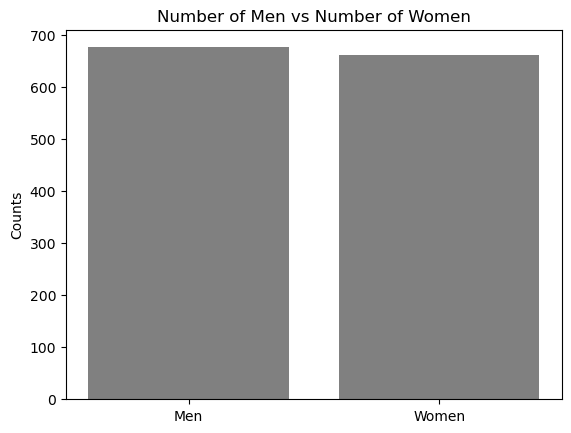

In [53]:
# plot the counts so we can see the difference in the number of men and the number of women
plt.bar(sex_labels, sex_counts, color='grey')
plt.ylabel('Counts')
plt.title('Number of Men vs Number of Women')
plt.show()

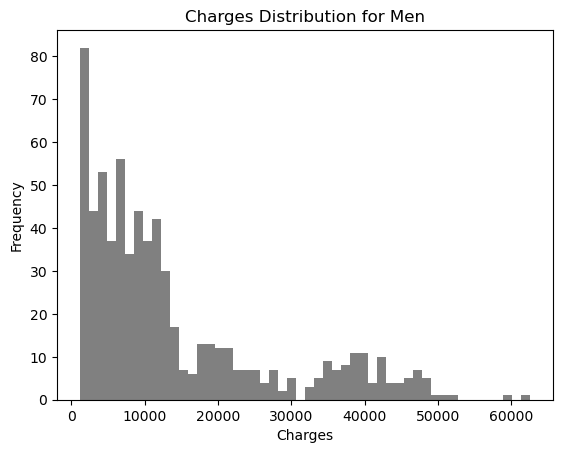

In [57]:
# we now want to examine the distribution of charges in each group
plt.hist(male_charges, bins=50, color='grey')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Men') 
plt.show()

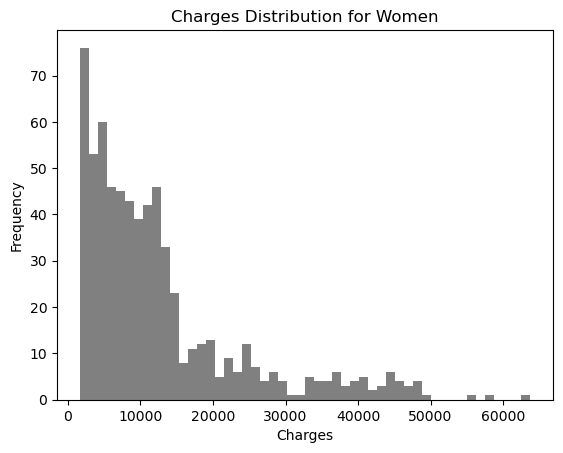

In [58]:
plt.hist(female_charges, bins=50, color='grey')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Women') 
plt.show()

Our data is once again right skewed so we look at medians.

In [62]:
# obtain the medians
male_median = stat.median(male_charges)
female_median = stat.median(female_charges)

sex_medians = [male_median, female_median]
print(sex_medians)

[9369.61575, 9412.9625]


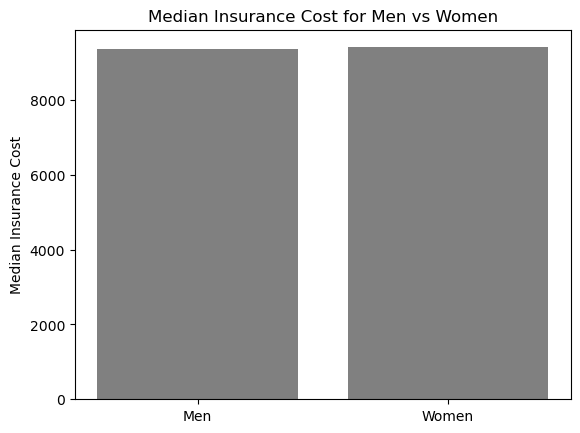

In [61]:
# plot the medians so we can see their difference
plt.bar(sex_labels, sex_medians, color='grey')
plt.ylabel('Median Insurance Cost')
plt.title('Median Insurance Cost for Men vs Women')
plt.show()

### Findings
Based on our graph there appears to be no difference in the cost of insurance for males and females.

## Number of Children
We next want to examine how the number of children a person has affects their insurance costs. Our data ranges from 0 to 5 children.

In [67]:
# create interval label for graphs
children_intervals = ['0', '1', '2', '3', '4', '5']

# obtain interval data
child_interval_1_charges, child_interval_1_avg_cost = interval_data(0, 1, children)
child_interval_2_charges, child_interval_2_avg_cost = interval_data(1, 2, children)
child_interval_3_charges, child_interval_3_avg_cost = interval_data(2, 3, children)
child_interval_4_charges, child_interval_4_avg_cost = interval_data(3, 4, children)
child_interval_5_charges, child_interval_5_avg_cost = interval_data(4, 5, children)
child_interval_6_charges, child_interval_6_avg_cost = interval_data(5, 6, children)

# add these to overall lists
child_intervals_counts = [len(child_interval_1_charges), len(child_interval_2_charges), 
                          len(child_interval_3_charges), len(child_interval_4_charges), 
                          len(child_interval_5_charges), len(child_interval_6_charges)]
print(child_intervals_counts)

[574, 324, 240, 157, 25, 18]


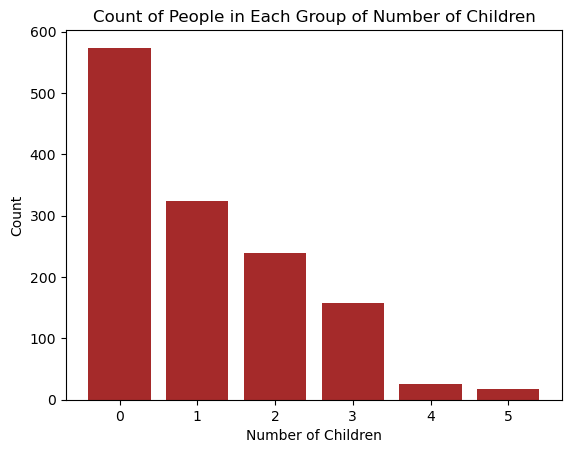

In [77]:
# graph the interval counts so we can see how the data is split
plt.bar(children_intervals, child_intervals_counts, color='brown')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Count of People in Each Group of Number of Children')
plt.show()

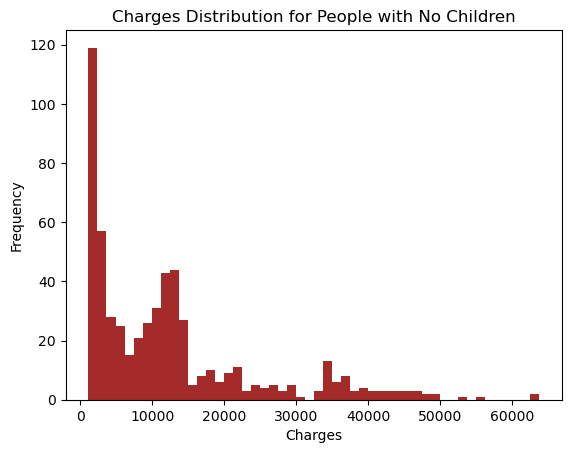

In [70]:
# plot the charges for each interval on a histogram to see the distribution
plt.hist(child_interval_1_charges, bins=50, color='brown')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for People with No Children')
plt.show()

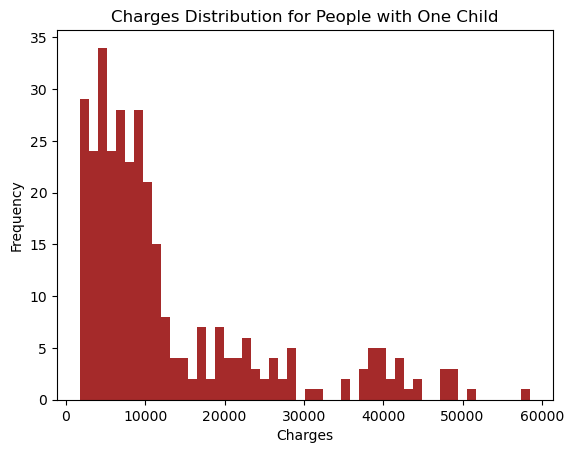

In [71]:
plt.hist(child_interval_2_charges, bins=50, color='brown')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for People with One Child')
plt.show()

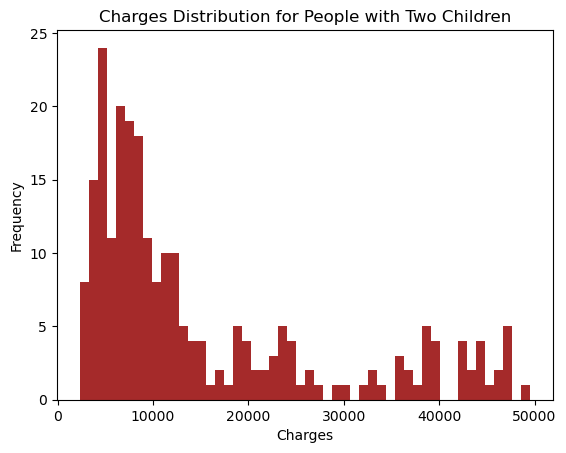

In [72]:
plt.hist(child_interval_3_charges, bins=50, color='brown')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for People with Two Children')
plt.show()

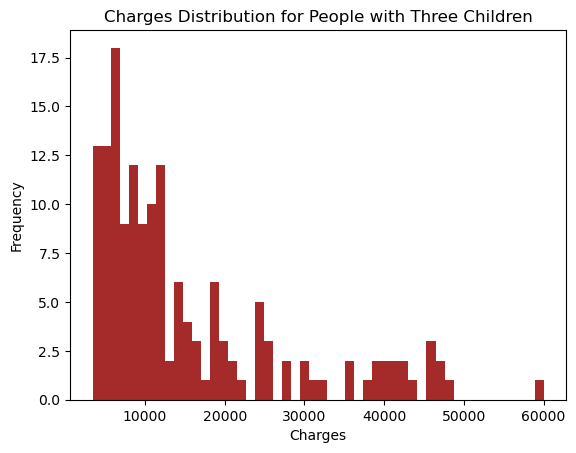

In [73]:
plt.hist(child_interval_4_charges, bins=50, color='brown')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for People with Three Children')
plt.show()

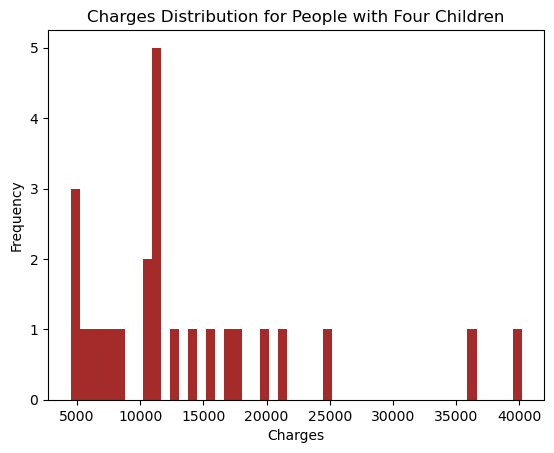

In [74]:
plt.hist(child_interval_5_charges, bins=50, color='brown')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for People with Four Children')
plt.show()

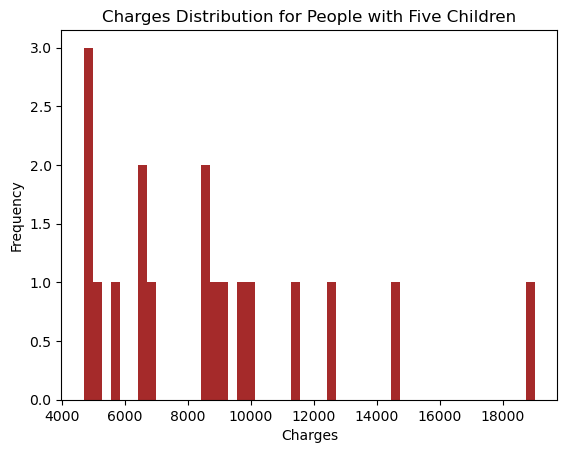

In [75]:
plt.hist(child_interval_6_charges, bins=50, color='brown')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for People with Five Children')
plt.show()

Since our groups are not evenly divided and the data in each has a right skew we will again look at medians.

In [78]:
# obtain the median for each interval
child_interval_1_median = stat.median(child_interval_1_charges)
child_interval_2_median = stat.median(child_interval_2_charges)
child_interval_3_median = stat.median(child_interval_3_charges)
child_interval_4_median = stat.median(child_interval_4_charges)
child_interval_5_median = stat.median(child_interval_5_charges)
child_interval_6_median = stat.median(child_interval_6_charges)

# get an overall list
child_medians = [child_interval_1_median, child_interval_2_median,
                 child_interval_3_median, child_interval_4_median,
                 child_interval_5_median, child_interval_6_median]
print(child_medians)

[9856.9519, 8483.870149999999, 9264.97915, 10600.5483, 11033.6617, 8589.56505]


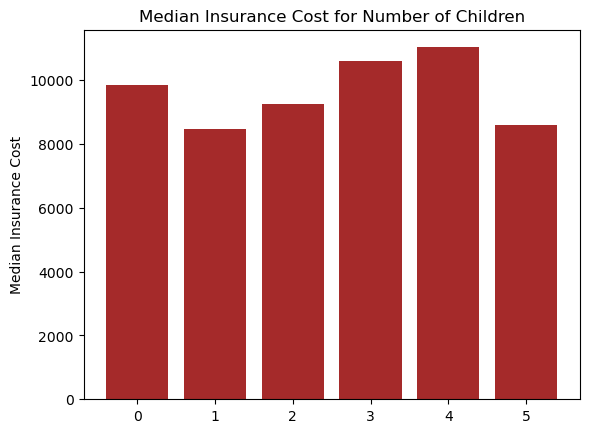

In [79]:
# plot the medians so we can see their difference
plt.bar(children_intervals, child_medians, color='brown')
plt.ylabel('Median Insurance Cost')
plt.title('Median Insurance Cost for Number of Children')
plt.show()

### Findings
The one through four children range shows that the more kids one has the higher their insurance cost is. The no children and five children do not demonstrate this which can be attributed to the fact that the no children group has significantly more data and the five children group has significantly less data which would affect their medians.

## Smoker vs Non-Smoker
We next want to see how insurance cost differs between people who smoke and people who do not.

In [81]:
# function used to separate our data into smoker or non-smoker
def smoker_data():
    smoker_costs = []
    non_smoker_costs = []
    for i in range(len(smoker)):
        if smoker[i] == 'yes':
            smoker_costs.append(charges[i])
        else:
            non_smoker_costs.append(charges[i])
    return smoker_costs, non_smoker_costs

# obtain the length of each list so we can see how many smokers and non-smokers we have
smoker_labels = ['Smoker', 'Non-Smoker']
smoker_charges, non_smoker_charges = smoker_data()
smoker_counts = [len(smoker_charges), len(non_smoker_charges)]
print(smoker_counts)

[274, 1064]
1338


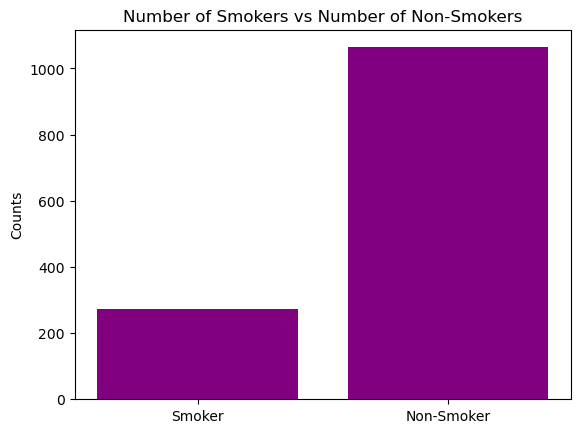

In [84]:
# plot the counts so we can see the difference in the number of smokers and non-smokers
plt.bar(smoker_labels, smoker_counts, color='purple')
plt.ylabel('Counts')
plt.title('Number of Smokers vs Number of Non-Smokers')
plt.show()

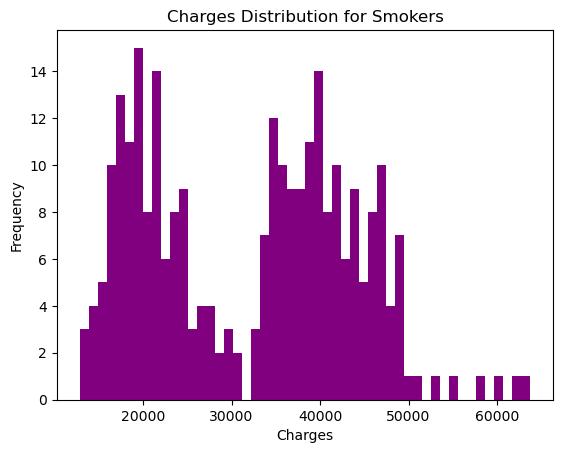

In [85]:
# we now want to examine the distribution of charges in each group
plt.hist(smoker_charges, bins=50, color='purple')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Smokers') 
plt.show()

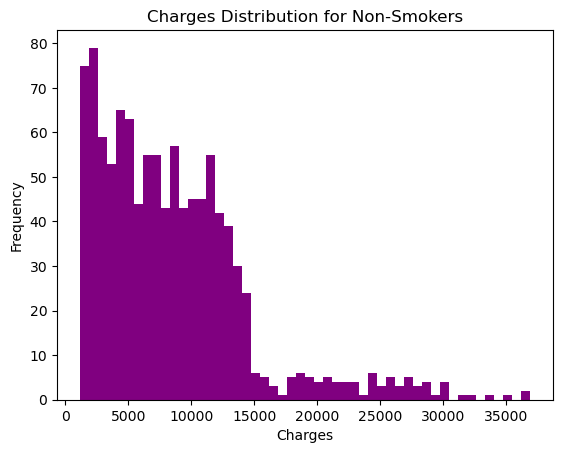

In [86]:
plt.hist(non_smoker_charges, bins=50, color='purple')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Non-Smokers') 
plt.show()

We will look at median since both graphs are right skewed. While the Smokers graph is bimodal, it doesn't have a lot of data represented due to its smaller sample size so we will stick with median.

In [87]:
# obtain the medians
smoker_median = stat.median(smoker_charges)
non_smoker_median = stat.median(non_smoker_charges)

smoker_medians = [smoker_median, non_smoker_median]
print(smoker_medians)

[34456.348450000005, 7345.4053]


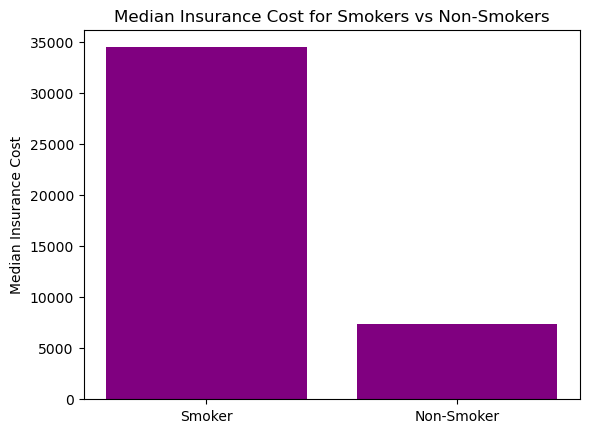

In [88]:
# plot the medians so we can see their difference
plt.bar(smoker_labels, smoker_medians, color='purple')
plt.ylabel('Median Insurance Cost')
plt.title('Median Insurance Cost for Smokers vs Non-Smokers')
plt.show()

### Findings
When comparing the medians we see that smokers have a significantly higher insurance cost than non-smokers. This is likely due to the health concerns associated with smoking but the exact cause is not something we can determine here.

## Region
We next want to look at how insurance costs change for each region. The regions represented in our data are<br>
- Southwest
- Southeast
- Northwest
- Northeast

In [95]:
# first find out what the different regions represented are
regions_represented = []
for i in range(len(regions)):
    if regions[i] not in regions_represented:
        regions_represented.append(regions[i])
print(regions_represented)

region_labels = ['Southwest', 'Southeast', 'Northwest', 'Northeast']

['southwest', 'southeast', 'northwest', 'northeast']


In [96]:
# next find out how many people are in each region
southwest_charges = []
southeast_charges = []
northwest_charges = []
northeast_charges = []

for i in range(len(regions)):
    if regions[i] == 'southwest':
        southwest_charges.append(charges[i])
    elif regions[i] == 'southeast':
        southeast_charges.append(charges[i])
    elif regions[i] == 'northwest':
        northwest_charges.append(charges[i])
    else:
        northeast_charges.append(charges[i])

region_counts = [len(southwest_charges), len(southeast_charges),
                 len(northwest_charges), len(northeast_charges)]
print(region_counts)

[325, 364, 325, 324]


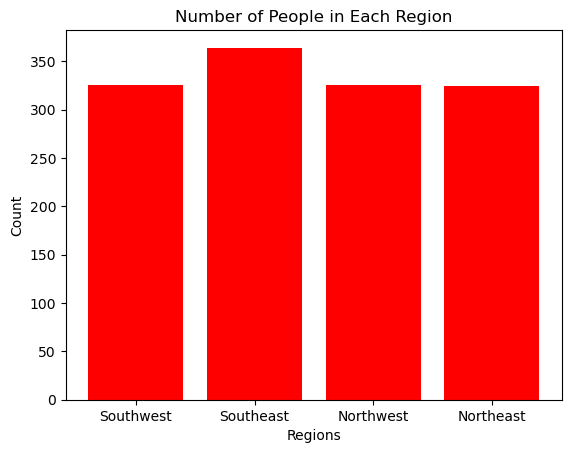

In [103]:
# plot region counts so we can see how our data is distributed
plt.bar(region_labels, region_counts, color='red')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Number of People in Each Region')
plt.show()

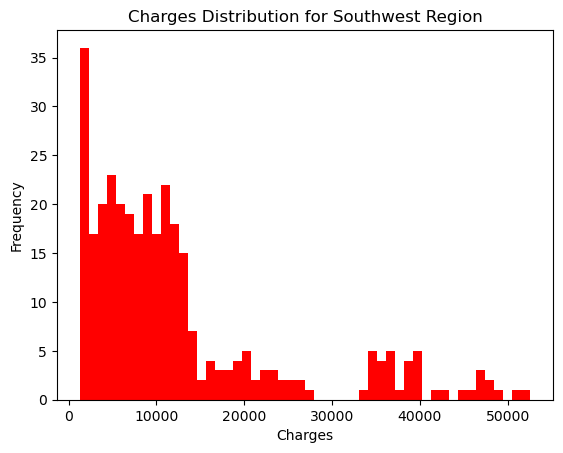

In [98]:
# we now want to examine the distribution of charges in each region
plt.hist(southwest_charges, bins=50, color='red')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Southwest Region') 
plt.show()

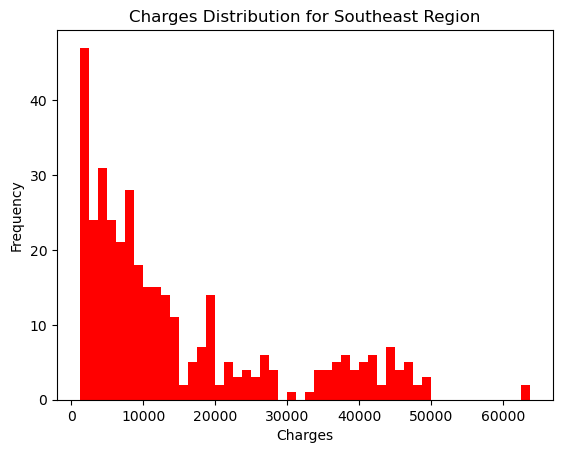

In [99]:
plt.hist(southeast_charges, bins=50, color='red')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Southeast Region') 
plt.show()

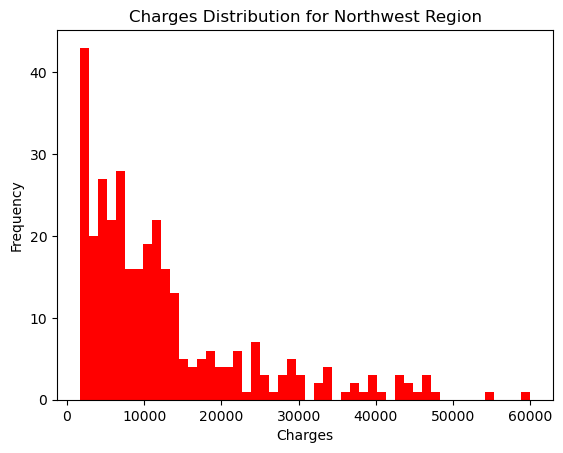

In [100]:
plt.hist(northwest_charges, bins=50, color='red')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Northwest Region') 
plt.show()

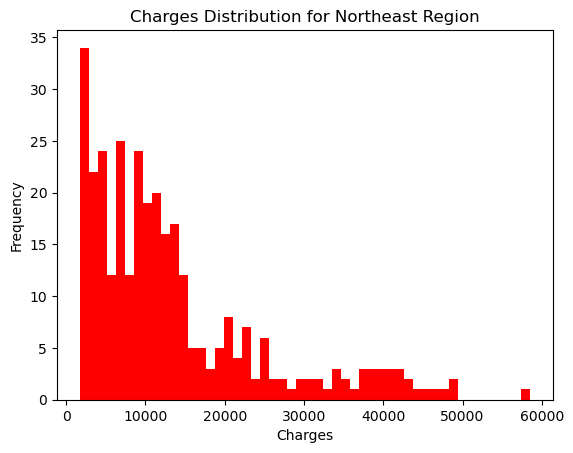

In [101]:
plt.hist(northeast_charges, bins=50, color='red')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution for Northeast Region') 
plt.show()

The data for each region is right skewed so we will look at the median.

In [102]:
# obtain the medians
southwest_median = stat.median(southwest_charges)
southeast_median = stat.median(southeast_charges)
northwest_median = stat.median(northwest_charges)
northeast_median = stat.median(northeast_charges)

region_medians = [southwest_median, southeast_median,
                  northwest_median, northeast_median]
print(region_medians)

[8798.593, 9294.131949999999, 8965.79575, 10057.652025]


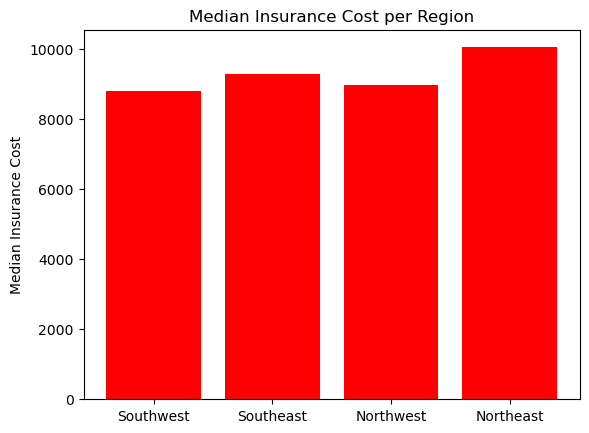

In [104]:
# plot the medians so we can see their difference
plt.bar(region_labels, region_medians, color='red')
plt.ylabel('Median Insurance Cost')
plt.title('Median Insurance Cost per Region')
plt.show()

### Findings
While there is not a large difference between the regions, we can see that for both the north and south the eastern regions are more expensive. We can also see that for both east and west the northern regions have higher insurance costs.

## Conclusions
We first note that we do not have enough data or information to determine exact causation. In general we see higher insurance costs for<br>
1. Age: older individuals
2. BMI: individuals with a higher BMI
3. Sex: no apparent difference
4. Children: higher number of children
5. Smoker Status: smokers
6. Region: northeast region

We also note that for each factor we compared medians. The initial thought was that we would be comparing the mean costs for our individual groups, but after examining the data distributions, we saw that they all demonstrated a right skew. This led us to look at the medians for comparison.